Number of samples: 100, Number of features: 1
Epoch [100/1000], Loss: 315.0637
Epoch [200/1000], Loss: 93.2351
Epoch [300/1000], Loss: 83.5883
Epoch [400/1000], Loss: 83.1618
Epoch [500/1000], Loss: 83.1428
Epoch [600/1000], Loss: 83.1419
Epoch [700/1000], Loss: 83.1419
Epoch [800/1000], Loss: 83.1419
Epoch [900/1000], Loss: 83.1419
Epoch [1000/1000], Loss: 83.1419


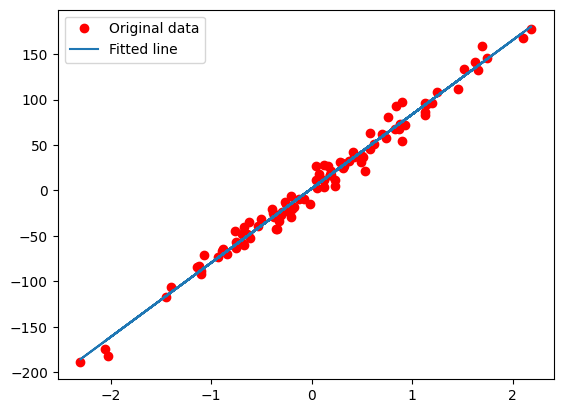

In [3]:
# 1) Design model (input, output, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop:
#  -forward pass -> compute prediction and loss
#  -backward pass : gradients
#  -update weights
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets

#0 prepapare dataset
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=10,random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)  # Reshape to match output size

n_samples, n_features = x.shape
print(f'Number of samples: {n_samples}, Number of features: {n_features}')

#1 model
input_size = n_features
output_size = 1  # We want a single output
model = nn.Linear(input_size, output_size)

#2 loss and optimizer

loss = nn.MSELoss()
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#3 training loop

num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predictions
    y_pred = model(x)
    l = loss(y_pred, y)
    
    # backward pass: compute loss
   
    l.backward()
    
    # Update weights
    optimizer.step()
    
    # Zero the gradients (otherwise they accumulate)
    optimizer.zero_grad()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {l.item():.4f}')
        
#plotting the results
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro', label='Original data')
plt.plot(x_numpy, predicted, label='Fitted line')
plt.legend()
plt.show()